In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
mnist = tf.keras.datasets.mnist
(X, y), (x_test, y_test) = mnist.load_data()

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.75)

In [46]:
model = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(1, 28, 28)), # reshape, conv2d expects 4 dims - batch size, height, width, and channels
    
    # Data Augmentation
    layers.RandomContrast(factor=0.1),
    layers.RandomWidth(factor=0.15), # horizontal stretch
    layers.RandomHeight(factor=0.15), # horizontal stretch

    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=4, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=4, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Global Average Pooling to ensure the right size even though I stretch the images for data augmentation
    layers.GlobalAveragePooling2D(),

    # Head
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [26]:
from tensorflow.keras.utils import to_categorical

X_train_reshaped = np.expand_dims(X_train, axis=1)
X_valid_reshaped = np.expand_dims(X_valid, axis=1)

# Check the shape of the reshaped data
print("Original shape:", X_train.shape)
print("Reshaped shape:", X_train_reshaped.shape)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_valid_onehot = to_categorical(y_valid, num_classes=10)

Original shape: (45000, 28, 28)
Reshaped shape: (45000, 1, 28, 28)


In [49]:
tf.random.set_seed(13)

optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

history = model.fit(
    X_train_reshaped, y_train_onehot,
    validation_data=(X_valid_reshaped, y_valid_onehot),
    epochs=10,
)



Epoch 1/10
1407/1407 [==============================] - 120s 84ms/step - loss: 0.0188 - categorical_accuracy: 0.9940 - val_loss: 0.0347 - val_categorical_accuracy: 0.9911
Epoch 2/10
1407/1407 [==============================] - 120s 85ms/step - loss: 0.0200 - categorical_accuracy: 0.9940 - val_loss: 0.0466 - val_categorical_accuracy: 0.9869
Epoch 3/10
1407/1407 [==============================] - 123s 87ms/step - loss: 0.0193 - categorical_accuracy: 0.9938 - val_loss: 0.0387 - val_categorical_accuracy: 0.9896
Epoch 4/10
1407/1407 [==============================] - 114s 81ms/step - loss: 0.0191 - categorical_accuracy: 0.9938 - val_loss: 0.0296 - val_categorical_accuracy: 0.9923
Epoch 5/10
1407/1407 [==============================] - 113s 80ms/step - loss: 0.0151 - categorical_accuracy: 0.9953 - val_loss: 0.0696 - val_categorical_accuracy: 0.9790
Epoch 6/10
1407/1407 [==============================] - 111s 79ms/step - loss: 0.0149 - categorical_accuracy: 0.9952 - val_loss: 0.0375 - val_cat

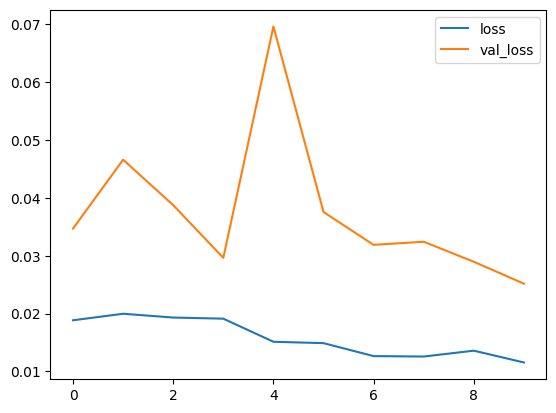

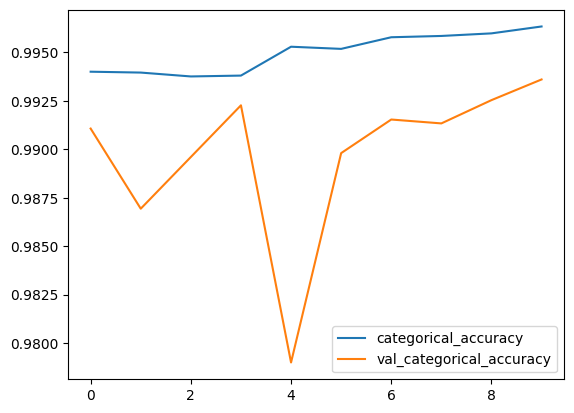

In [50]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();

In [51]:
model.save(filepath='digit_recognizer_v4.keras', overwrite=True)

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 random_contrast_6 (RandomC  (None, 28, 28, 1)         0         
 ontrast)                                                        
                                                                 
 random_width_3 (RandomWidt  (None, 28, None, 1)       0         
 h)                                                              
                                                                 
 random_height_2 (RandomHei  (None, None, None, 1)     0         
 ght)                                                            
                                                                 
 batch_normalization_22 (Ba  (None, None, None, 1)     4         
 tchNormalization)                                    

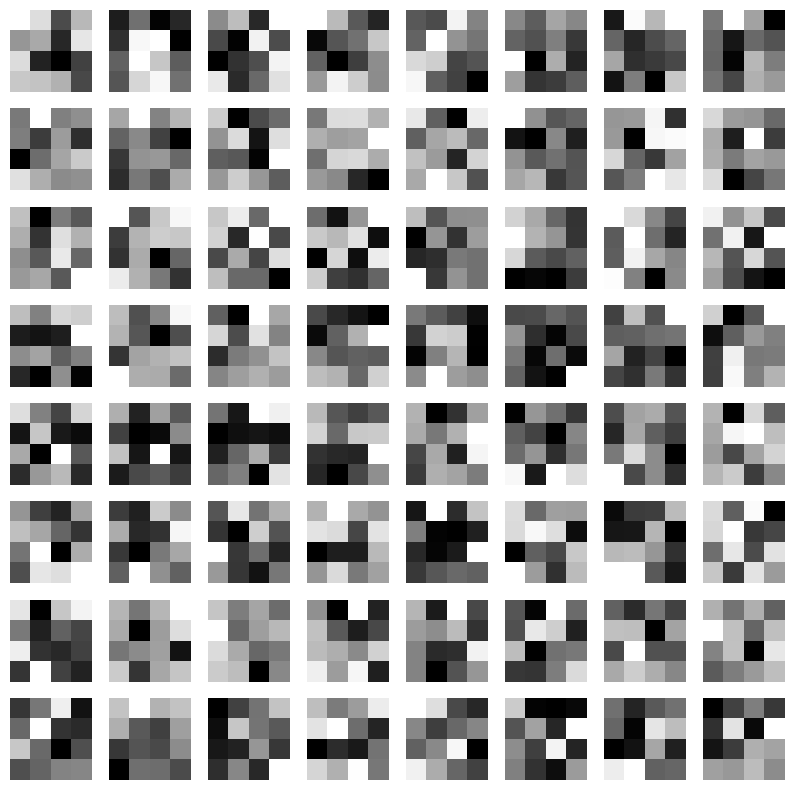

In [38]:
filters = model.layers[6].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(filters.shape[-2]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')  # Assuming the filters are grayscale
    plt.axis('off')
plt.show()